In [5]:
import pickle
data = []
for file in [
    "/home/od/Desktop/repos/dfd-clip/misc/dev-mode+force-rgb.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/dev-mode+force-hue.pickle",
    "/home/od/Desktop/repos/dfd-clip/misc/normal+frame.pickle",
]:
    with open(file, "rb") as f:
        data.append(pickle.load(f))
data[0]

{'k': [array([[3.4836754e-05, 3.7742429e-05, 4.0913917e-05, 4.2435378e-05,
          4.0989362e-05, 3.9359224e-05, 3.8342027e-05, 3.7894581e-05,
          3.8095510e-05, 4.0304665e-05, 3.9362603e-05, 3.7411090e-05,
          3.9835664e-05, 3.6678062e-05],
         [3.5102537e-05, 3.6987887e-05, 4.2512766e-05, 4.5221441e-05,
          4.1066942e-05, 3.7833244e-05, 3.6948637e-05, 3.6996382e-05,
          3.8556631e-05, 4.1714502e-05, 4.2212469e-05, 3.7910257e-05,
          3.9832681e-05, 3.8566275e-05],
         [3.4954181e-05, 3.5699362e-05, 3.8541162e-05, 3.1895928e-05,
          2.9227780e-05, 3.3019998e-05, 3.6644986e-05, 3.5415469e-05,
          2.7584540e-05, 2.6310976e-05, 3.1617186e-05, 3.8512910e-05,
          3.7759866e-05, 3.8564274e-05],
         [3.3703705e-05, 3.6145833e-05, 3.5885718e-05, 3.2447890e-05,
          2.8459581e-05, 3.1640335e-05, 3.8185426e-05, 3.5404981e-05,
          3.2571599e-05, 2.8925078e-05, 3.3761717e-05, 3.9324754e-05,
          3.7499711e-05, 3.83754

In [25]:
l = {
    "k": [sum([w * data[i]["k"][l] for i, w in enumerate([.5, .5, -1])]) for l in range(12)],
    "v": [sum([w * data[i]["v"][l] for i, w in enumerate([.5, .5, -1])]) for l in range(12)]
}

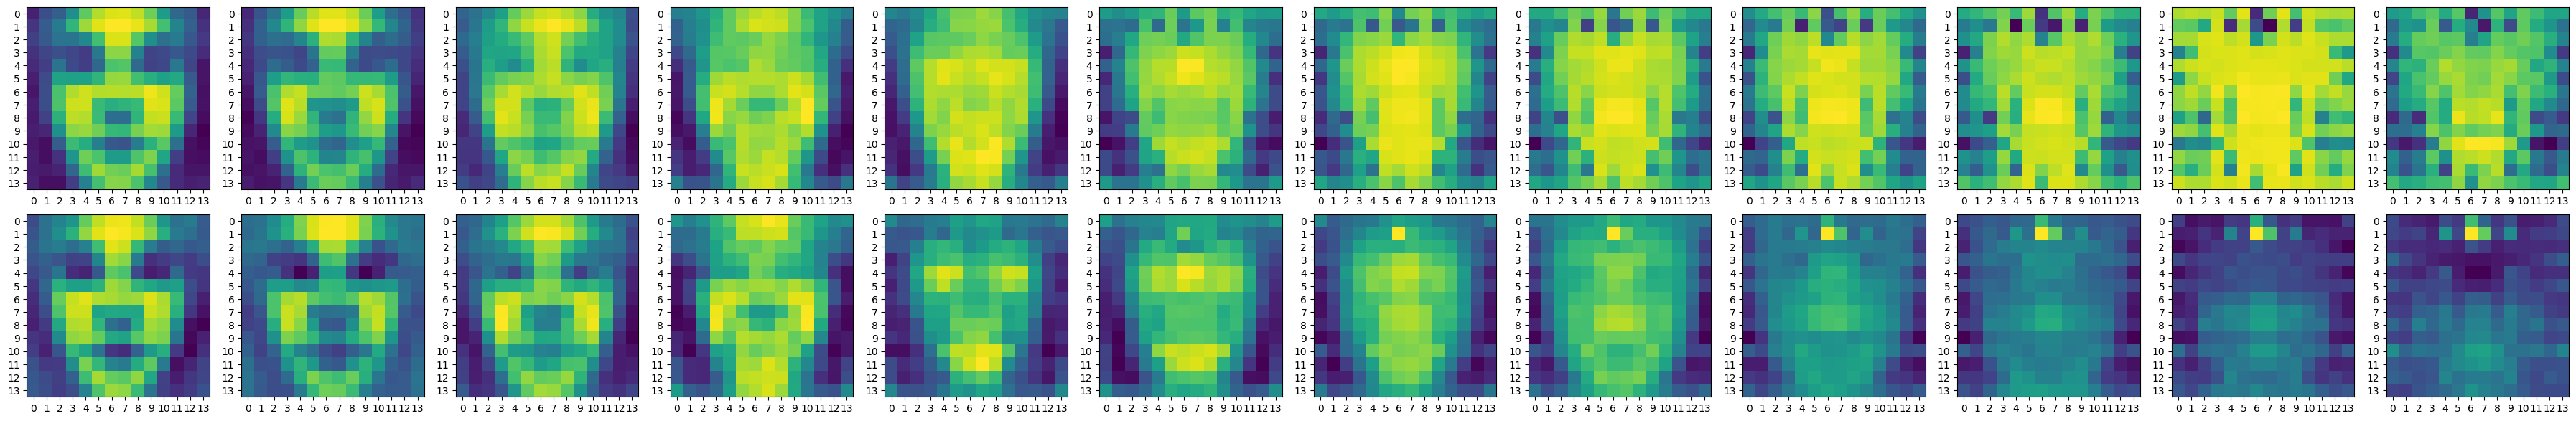

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(36, 6))
for j, s in enumerate(["k", "v"]):
    for i, v in enumerate(l[s]):
        plt.subplot(2, 12, j * 12 + i + 1)
        im = plt.imshow(v)

        plt.gca().set_xticks(np.arange(14))
        plt.gca().set_yticks(np.arange(14))

plt.tight_layout()
plt.show()